In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder


In [2]:
df = pd.read_csv(r"applicant.csv")
df
names=[
        "Age","Workclass","fnlwgt","Education","Education-Num","Marital Status",
        "Occupation","Relationship","Race","Gender","Capital Gain","Capital Loss",
        "Hours per week","Country","Target"]
df.columns = names
df

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education-Num   32560 non-null  int64 
 5   Marital Status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Gender          32560 non-null  object
 10  Capital Gain    32560 non-null  int64 
 11  Capital Loss    32560 non-null  int64 
 12  Hours per week  32560 non-null  int64 
 13  Country         32560 non-null  object
 14  Target          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
print(df.duplicated().sum()) #duplicated value encountered
# percentage of duplicated values
print(np.round(100*df.duplicated().sum()/len(df),1),"%")


24
0.1 %


In [5]:
#checking for null values
df.isna().sum()
# no null values found



Age               0
Workclass         0
fnlwgt            0
Education         0
Education-Num     0
Marital Status    0
Occupation        0
Relationship      0
Race              0
Gender            0
Capital Gain      0
Capital Loss      0
Hours per week    0
Country           0
Target            0
dtype: int64

In [6]:
df.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Text(0.5, 1.0, 'Target Distribution ')

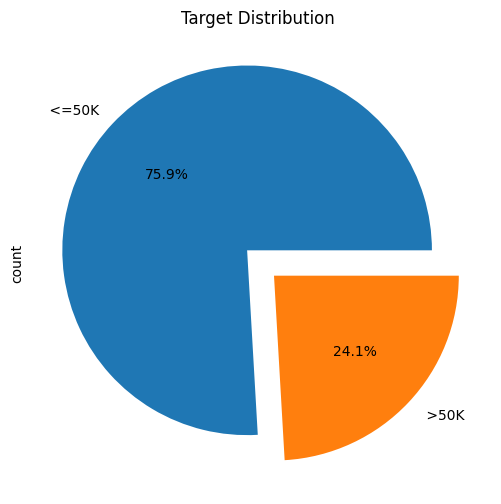

In [7]:
# lets check for the propotion of target variable ok i.e Target distribution

plt.figure(figsize=(12,6))
df.Target.value_counts().plot.pie(explode=[0.1,0.1],autopct = '%1.1f%%').set_title("Target Distribution ")
# can be seen that this is a  dispropotionate target distribution and to deal with this we might need to over sample the minority i.e >50K

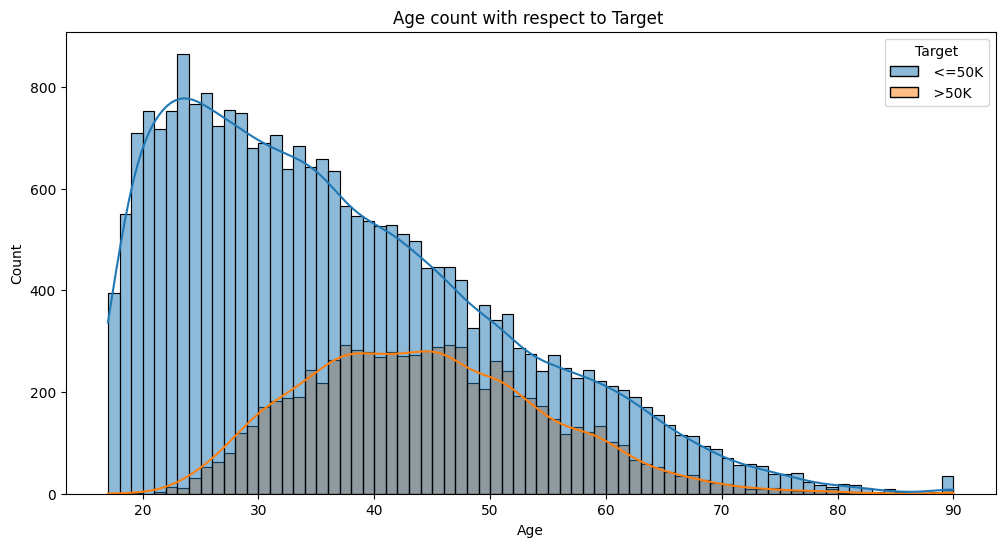

In [8]:
# lets analyze the features and plot them to better understand them with respect to the target
plt.figure(figsize=(12,6))
sns.histplot(data = df , x = 'Age',hue='Target',kde =True,binwidth=1)
plt.title("Age count with respect to Target ")
plt.show()
# age is not playing a major role here but for the consideration we can take it as
# age ranging from 20 - 80 are more likely to be in >50k category
# and for the other it is not linearly dependent


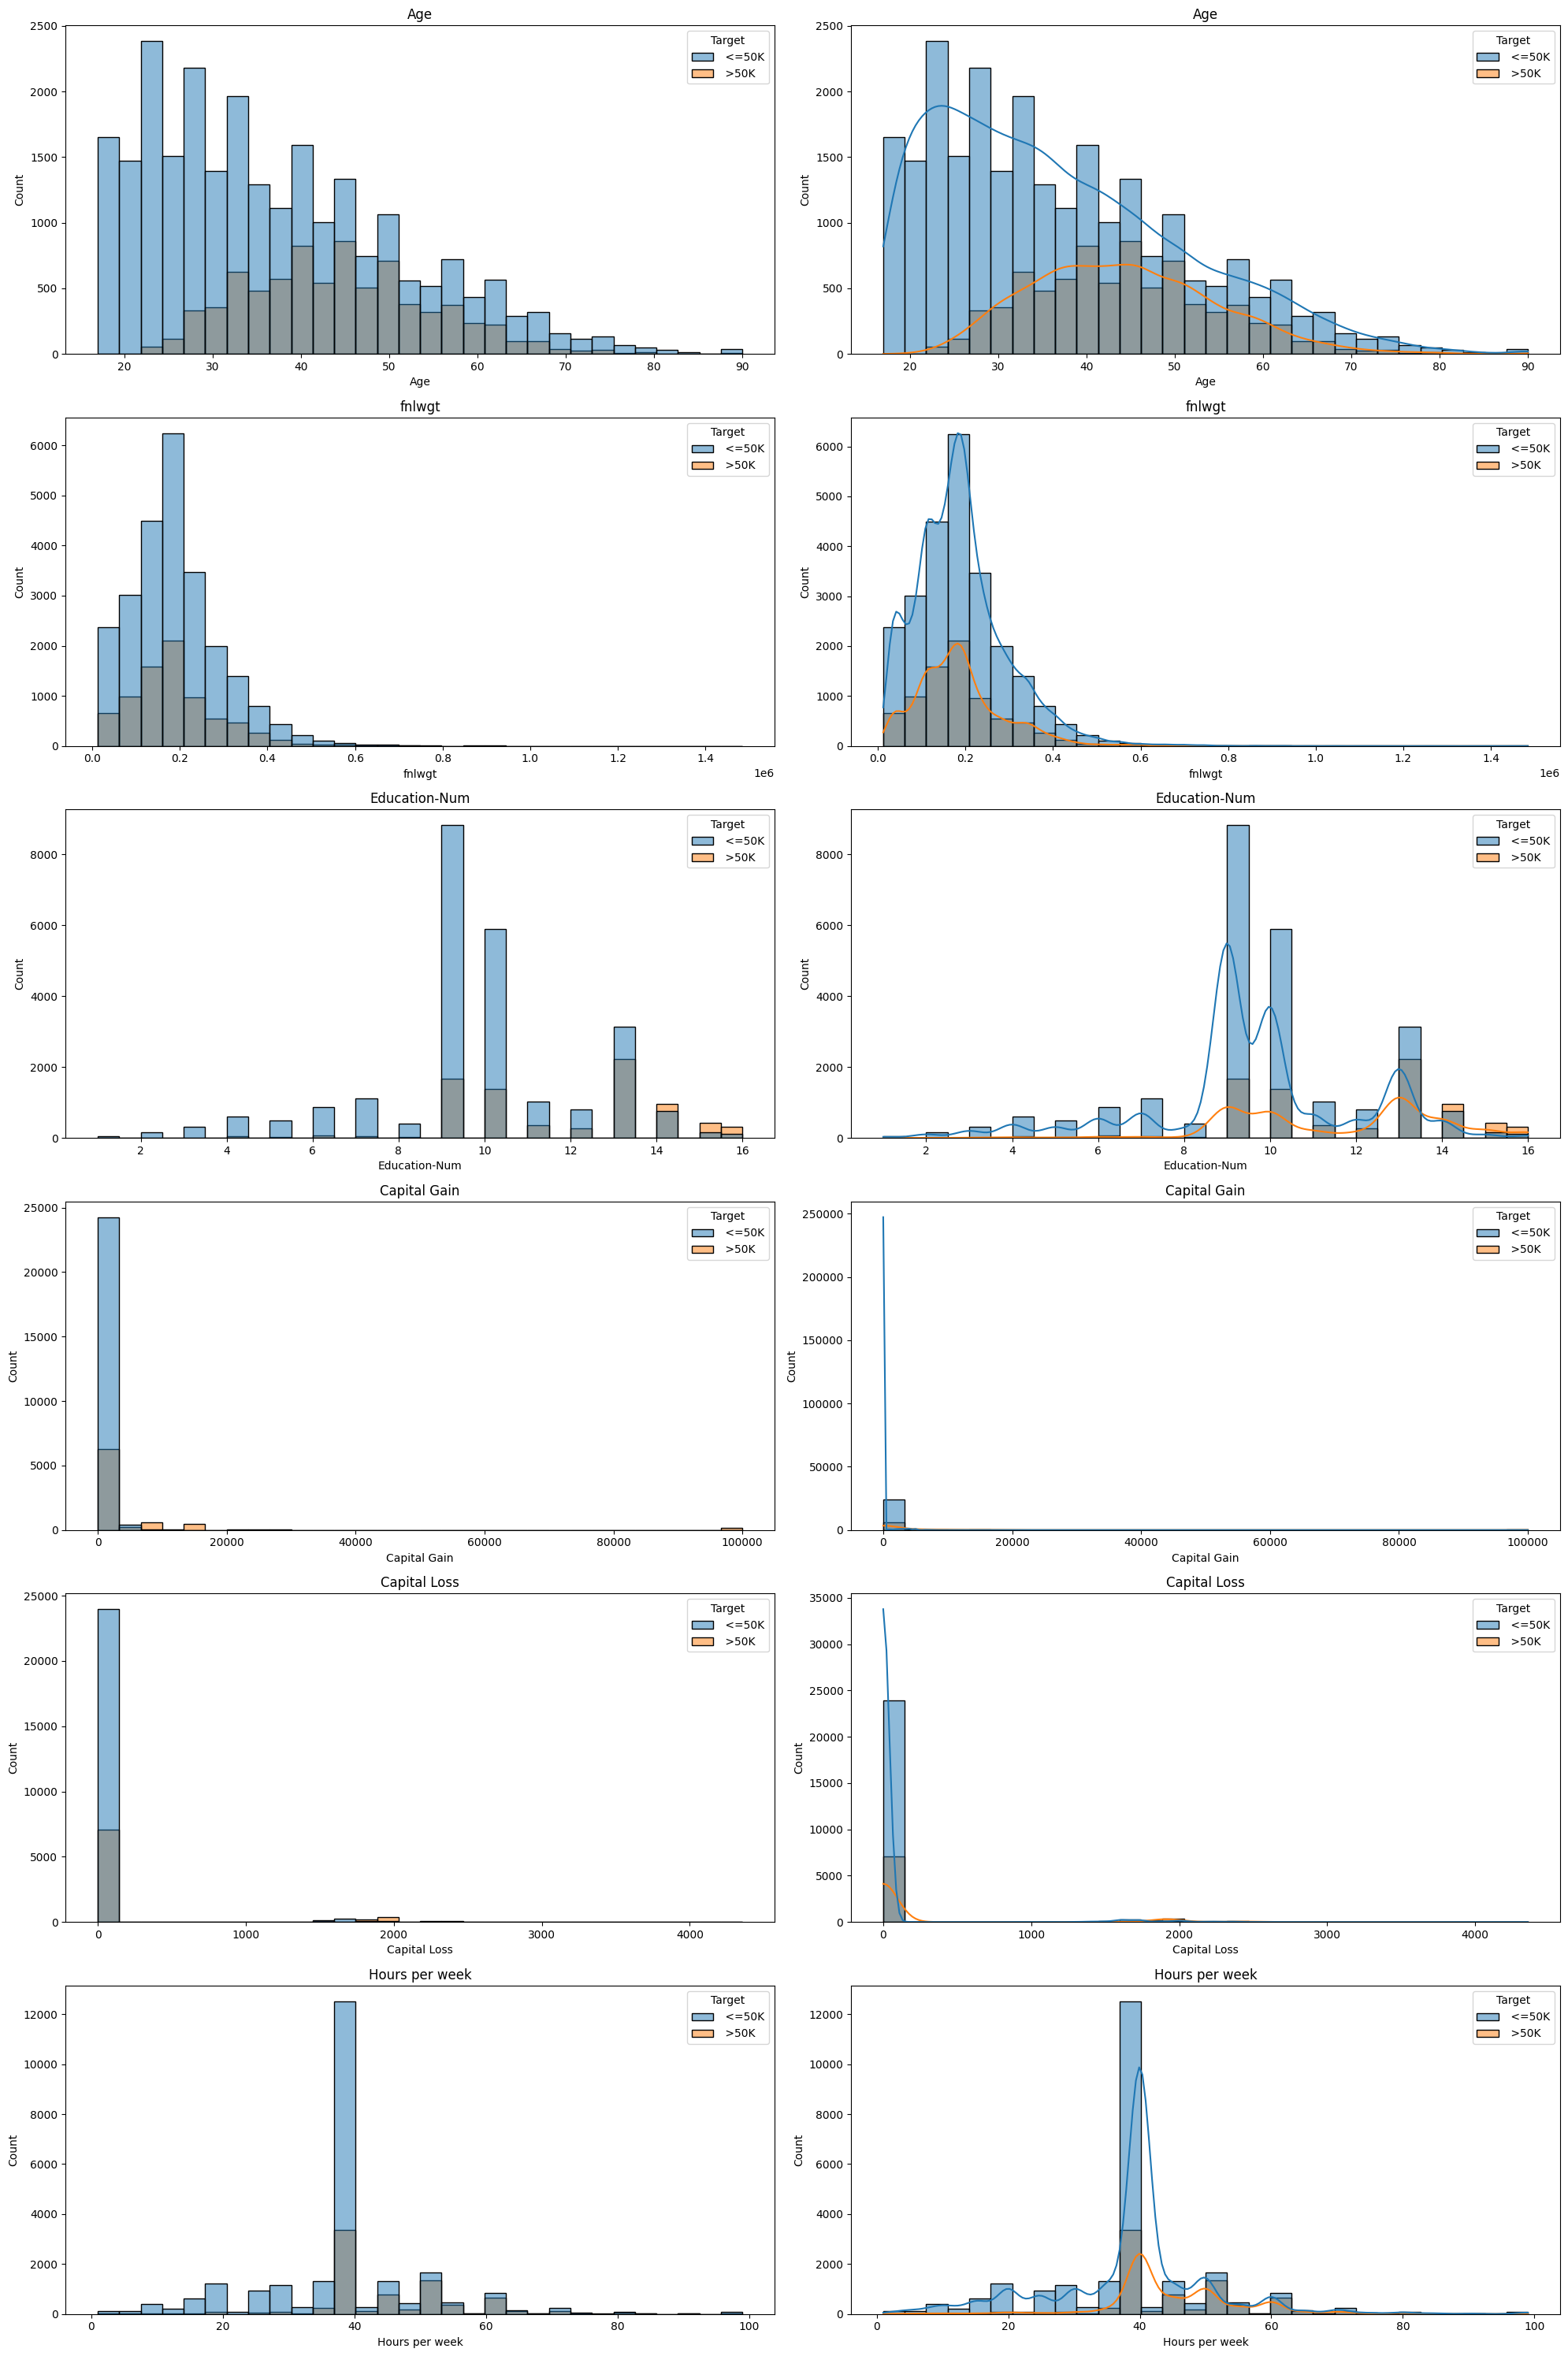

In [9]:
selectintcol = df.select_dtypes('int').columns
selectintcol
fig=plt.figure(figsize=(20,30))
for i, var_name in enumerate(selectintcol):
    # Left plot
    ax=fig.add_subplot(6,2,2*i+1)
    sns.histplot(data=df, x=var_name, axes=ax, bins=30, kde=False, hue='Target')
    ax.set_title(var_name)

    # Right plot (truncated)
    ax=fig.add_subplot(6,2,2*i+2)
    sns.histplot(data=df, x=var_name, axes=ax, bins=30, kde=True, hue='Target')
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

<Axes: ylabel='count'>

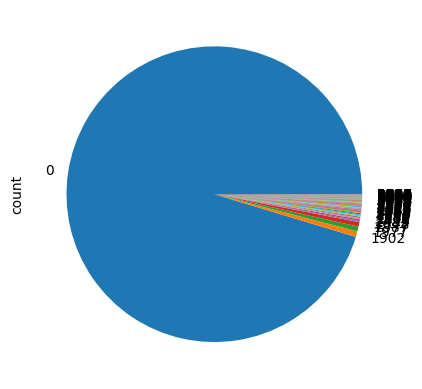

In [10]:
# no impact of captial gain and loss as they are merely all zero accross the population insight : drop them
# Education num is a good feature
# other features are no good use so we are keeping education - num as only feature selected from the dtypes int
# fnlwght is also linearly independent
df['Capital Loss'].value_counts().plot.pie()


<Axes: ylabel='count'>

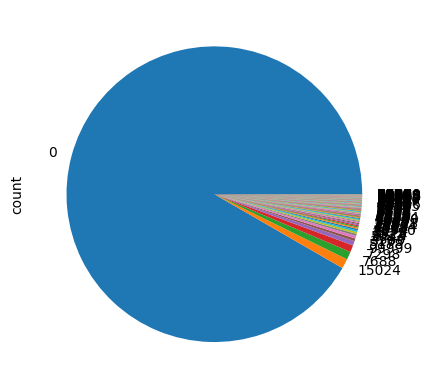

In [11]:
df['Capital Gain'].value_counts().plot.pie()


In [12]:
df['Occupation'].value_counts()

Occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: count, dtype: int64

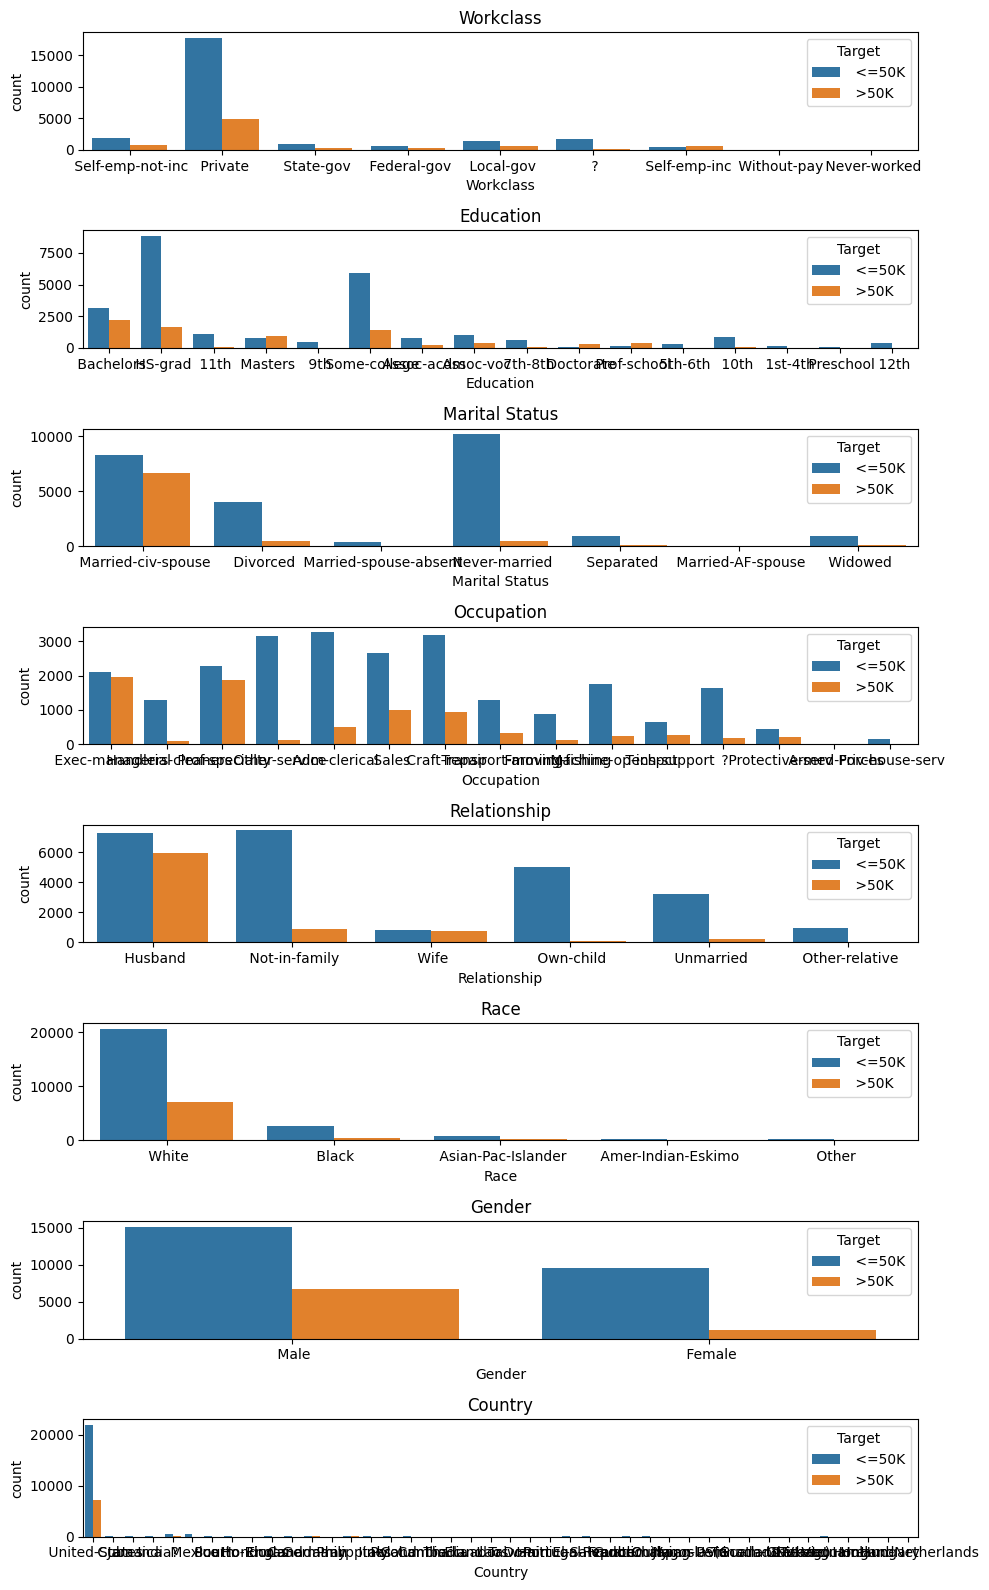

In [14]:
# categorical data viz
cat_cols = df.select_dtypes('object').drop(['Target'], axis=1)
cat_cols = cat_cols.columns

# Plot categorical features
fig = plt.figure(figsize=(10, 16))
for i, var_name in enumerate(cat_cols):
    ax = fig.add_subplot(8, 1, i + 1)
    sns.countplot(data=df, x=var_name, ax=ax, hue='Target')
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

```python
we have found great results from this
     - firstly we can clearly observe that the private sector workclass has the most > 50k and as well as the <=50k  
     - majority of >50k has education background as Bachleors  majority of <=50k have education as ms-grad
     -  Married-civ-spouse has the highest >50k never married has the highest <=50k
     - occupation plays a major role in identifying the target value  
     - relationship : husband is more likely to earn >50k and not in family person is <=50k
     - race (white dominant)
     - gender (male dominant in both aspect ) (crucial feature as most of females are <=50k)
     - country (restricted to US only as population majority lies there )
```
     

In [15]:
#cat colms to encode :
# important colms are gender ,education num , occupation , relationship , working hours

from sklearn.preprocessing import LabelEncoder

encodingcolms = ['Gender','Occupation','Relationship','Target']
def encode_colms(df,colms):
    le = LabelEncoder()
    for col in colms:
        df[col] = le.fit_transform(df[col].astype(str))
encode_colms(df,encodingcolms)
df.tail()


,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,13,5,White,0,0,0,38,United-States,0
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,7,0,White,1,0,0,40,United-States,1
32557,58,Private,151910,HS-grad,9,Widowed,1,4,White,0,0,0,40,United-States,0
32558,22,Private,201490,HS-grad,9,Never-married,1,3,White,1,0,0,20,United-States,0
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,4,5,White,0,15024,0,40,United-States,1


In [16]:
df.dtypes

Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education-Num      int64
Marital Status    object
Occupation         int64
Relationship       int64
Race              object
Gender             int64
Capital Gain       int64
Capital Loss       int64
Hours per week     int64
Country           object
Target             int64
dtype: object

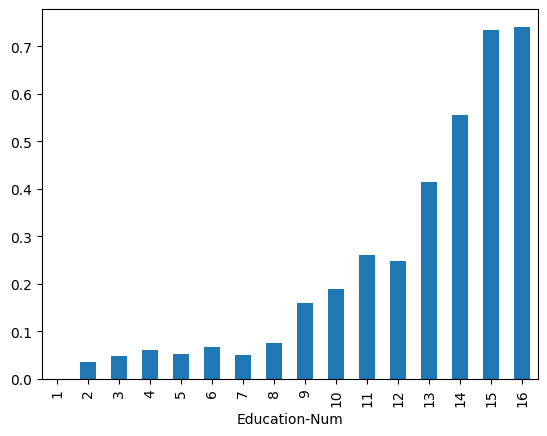

In [17]:
df.groupby('Education-Num')['Target'].mean()
df.groupby('Education-Num').Target.mean().plot(kind='bar')
plt.show()

In [18]:
!pip install imbalanced-learn


Text(0.5, 1.0, 'Gender Distribution')

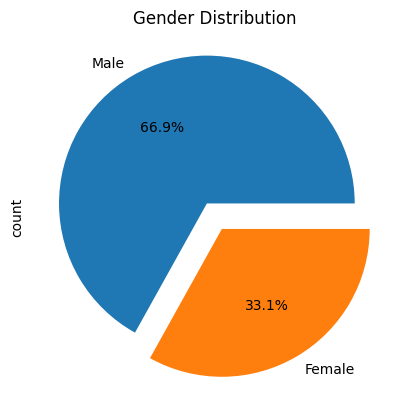

In [19]:
#as we had seen that the male samples were over the females one so this might make model biased
df['Gender'].value_counts().plot.pie(explode=[0.1, 0.1], autopct='%1.1f%%', labels=['Male', 'Female']).set_title("Gender Distribution")

In [20]:
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold

x = df[['Gender','Occupation','Relationship','Education-Num','Age']]
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.2,random_state=40)

In [22]:
X_train

,Gender,Occupation,Relationship,Education-Num,Age
22632,0,0,4,7,25
14962,0,10,5,15,38
15802,0,12,3,12,20
22771,0,12,5,7,35
17627,1,7,0,7,52
...,...,...,...,...,...
27640,1,10,0,14,41
14501,0,9,1,3,27
30727,1,10,1,13,65
14555,1,3,1,5,31


In [23]:

# Perform cross-validation with StratifiedKFold and get predictions
Svm  = SVC(kernel='linear', random_state=40)
Svm.fit(X_train,y_train)
y_pred_cv= Svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_cv)
conf_matrix = confusion_matrix(y_test, y_pred_cv)
classification_rep = classification_report(y_test, y_pred_cv)
print(f"accuracy : {accuracy} \n conffusion matrix :\n {conf_matrix} \n classifaction report \n:{classification_rep}\n" )


accuracy : 0.8045915233415234 
 conffusion matrix :
 [[18849   915]
 [ 4175  2109]] 
 classifaction report 
:              precision    recall  f1-score   support

           0       0.82      0.95      0.88     19764
           1       0.70      0.34      0.45      6284

    accuracy                           0.80     26048
   macro avg       0.76      0.64      0.67     26048
weighted avg       0.79      0.80      0.78     26048




In [24]:
# using a Nueral Net and XGB to test if the accuracy varies along the models
from keras import Sequential
from keras.layers import Dense
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.model_selection import GridSearchCV

def xgb(X_train,X_test,y_train,y_test):
    param_grid = {
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [150, 180, 220],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0]
    }

    xgb_classifier = XGBClassifier(random_state=42)
    # Create GridSearchCV
    grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print("Best Hyperparameters:", grid_search.best_params_)

    # Make predictions on the test data using the best model
    y_pred = grid_search.best_estimator_.predict(X_test)
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Test Accuracy: {accuracy:.4f}')

# Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 150, 'subsample': 0.9}
# Test Accuracy: 0.8259
xgb(X_train,X_test,y_train,y_test)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 150, 'subsample': 1.0}
Test Accuracy: 0.8318


In [25]:
# sequential nueral net

def nueralnet(X_train,X_test,y_train,y_test):
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        model = tf.keras.Sequential([
            tf.keras.layers.Input(shape=(5,)),
            tf.keras.layers.Dense(64, activation='tanh'),  # Dense hidden layer with ReLU activation
            tf.keras.layers.Dense(32,activation='tanh'),
            tf.keras.layers.Dense(1, activation='sigmoid')
        ])
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)
        loss, accuracy = model.evaluate(X_test, y_test)
        print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')
nueralnet(X_train,X_test,y_train,y_test)


Epoch 1/10
184/184 [==============================] - 2s 4ms/step - loss: 0.4647 - accuracy: 0.7761 - val_loss: 0.4250 - val_accuracy: 0.7868
Epoch 2/10
184/184 [==============================] - 0s 2ms/step - loss: 0.4127 - accuracy: 0.8063 - val_loss: 0.3930 - val_accuracy: 0.7991
Epoch 3/10
184/184 [==============================] - 0s 3ms/step - loss: 0.3933 - accuracy: 0.8094 - val_loss: 0.3834 - val_accuracy: 0.8021
Epoch 4/10
184/184 [==============================] - 0s 3ms/step - loss: 0.3823 - accuracy: 0.8125 - val_loss: 0.3695 - val_accuracy: 0.8067
Epoch 5/10
184/184 [==============================] - 0s 2ms/step - loss: 0.3761 - accuracy: 0.8198 - val_loss: 0.3675 - val_accuracy: 0.8083
Epoch 6/10
184/184 [==============================] - 0s 2ms/step - loss: 0.3742 - accuracy: 0.8154 - val_loss: 0.3692 - val_accuracy: 0.8129
Epoch 7/10
184/184 [==============================] - 0s 2ms/step - loss: 0.3742 - accuracy: 0.8232 - val_loss: 0.3657 - val_accuracy: 0.8160
Epoch 

> Accuracy is as follows :
    </br>
    - nueral net with 2 hidden layer using activation function as tanh gave the highest accuracy that is `**82.67**`
    <br/>
    - xgb classifier with best param as Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 150, 'subsample': 0.9} gave an accuracy of 82.59 %
    <br/>
    - svm gave the lowest accuracy 80.7 %


